# 🧌 Monstrinho 3.7

Finalmente, desbloqueamos uma nova raça de monstros. Agora, temos que derrotar monstros com os conhecimentos obtidos nas aulas de magia acerca de Algoritmos Genéticos! E para esse desafio, teremos que observar como os algoritmos de otimização são eficientes para cada um de seus casos.

O que vamos fazer é o seguinte: vamos medir e comparar o tempo de execução de três métodos de busca para o problema das **caixas binárias**.

- Busca Aleatória
- Busca em Grade
- Algoritmo Genético

O critério de parada é encontrar a solução do problema (todas as caixas iguais a `1`) e para extrair tendências confiáveis, vamos avaliar 10 valores de `n` (número de caixas) e repetiremos 5 vezes cada experimento, calculando média e desvio‑padrão dos tempos.

## 🏁 Vamos começar!

Para iniciarmos, vamos começar importando as bilbiotecas que vamos utilizar para esse monstrinho.

In [1]:
import random
import time
import itertools
import pandas as pd
import matplotlib.pyplot as plt

> A biblioteca `time` é utilizada medir o tempo de execução dos algoritmos. [1]

Para manter a reprodutibilidade dos experimentos, vamos definir uma semente aleatória. Assim, os resultados serão os mesmos para todos que executarem o código.

In [2]:
random.seed(7)

Vamos nos aproveitar da nossa biblioteca que criamos junto com o professor. Nela, vamos encontrar as funções:

- `funcao_objetivo_cb`: irá retornar a soma dos valores de uma caixa binária
- `cria_candidato_cb`: irá criar um candidato aleatório
- `populacao_cb`: irá criar uma população de candidatos
- `funcao_objetivo_pop_cb`: irá retornar a soma dos valores de uma população de candidatos
- `selecao_roleta_max`: irá selecionar um candidato da população usando o método da roleta
- `cruzamento_ponto_simples`: irá realizar o cruzamento de dois candidatos usando o ponto simples
- `mutacao_simples_cb`: irá realizar a mutação de um candidato

In [3]:
from Scripts.Monstrinho37 import funcao_objetivo_cb
from Scripts.Monstrinho37 import cria_candidato_cb
from Scripts.Monstrinho37 import populacao_cb
from Scripts.Monstrinho37 import funcao_objetivo_pop_cb
from Scripts.Monstrinho37 import selecao_roleta_max
from Scripts.Monstrinho37 import cruzamento_ponto_simples
from Scripts.Monstrinho37 import mutacao_simples_cb    

Excelente! Agora que importamos tudo que precisamos, vamos começar definindo as funções que vão implementar os três métodos de busca.

### 🃏 Busca Aleatória

A Busca Aleatória é um método simples que gera candidatos aleatórios até encontrar a solução. Vamos implementar essa função.

In [4]:
def busca_aleatoria(n: int) -> float:
    """
    Busca aleatória para encontrar o candidato que atinge o alvo `n`.

    Args:
        `n` (`int`): O alvo a ser atingido pela função objetivo.

    Returns:
        `float`: Tempo gasto para encontrar o candidato que atinge o alvo.
    """
    alvo = n
    cand = cria_candidato_cb(n)

    inicio = time.perf_counter()

    while funcao_objetivo_cb(cand) != alvo:
        cand = cria_candidato_cb(n)

    fim = time.perf_counter()

    tempo = fim - inicio

    return tempo

### 🚓 Busca em Grade

In [5]:
def busca_em_grade(n: int) -> float:
    """
    Busca em grade para encontrar o candidato que atinge o alvo `n`.

    Args:
        `n` (`int`): O alvo a ser atingido pela função objetivo.

    Returns:
        `float`: Tempo gasto para encontrar o candidato que atinge o alvo.
    """
    alvo = n

    inicio = time.perf_counter()

    for prod in itertools.product([0, 1], repeat=n):
        if sum(prod) == alvo:
            break

    fim = time.perf_counter()

    tempo = fim - inicio

    return tempo

### 🧬 Algoritmo Genético

O Algoritmo Genético é um método de otimização inspirado na evolução natural. Ele utiliza seleção, cruzamento e mutação para evoluir uma população de candidatos em direção à solução ideal.

In [6]:
def algoritmo_genetico(
    n: int,
    tamanho_pop: int = 100,
    chance_cx: float = 0.8,
    chance_mut: float = 0.05,
) -> float:
    """
    Algoritmo Genético para encontrar o candidato que atinge o alvo `n`.

    Args:
        `n` (`int`): O alvo a ser atingido pela função objetivo.
        `tamanho_pop` (`int`, opcional): Tamanho da população inicial. Padrão é 100.
        `chance_cx` (`float`, opcional): Probabilidade de cruzamento. Padrão é 0.8.
        `chance_mut` (`float`, opcional): Probabilidade de mutação. Padrão é 0.05.

    Returns:
        `float`: Tempo gasto para encontrar o candidato que atinge o alvo.
    """
    alvo = n
    pop = populacao_cb(tamanho_pop, n)
    inicio = time.perf_counter()

    while True:
        fitness = funcao_objetivo_pop_cb(pop)
        if max(fitness) == alvo:
            break

        # Seleção
        selecionados = selecao_roleta_max(pop, fitness)

        # Cruzamento
        nova_pop = []
        for i in range(0, tamanho_pop, 2):
            pai, mae = selecionados[i], selecionados[(i + 1) % tamanho_pop]
            filho1, filho2 = cruzamento_ponto_simples(pai, mae, chance_cx)
            nova_pop.extend([filho1, filho2])

        # Mutação
        mutacao_simples_cb(nova_pop, chance_mut)
        pop = nova_pop

    fim = time.perf_counter()

    tempo = fim - inicio

    return tempo

Ótimo! Agora que temos as funções de busca implementadas, vamos definir a função principal que irá executar os experimentos e medir o tempo de execução de cada método.

## 🧪 Experimentos

Vamos criar uma função que irá executar os experimentos para cada valor de `n` e calcular a média e o desvio-padrão dos tempos de execução dos três métodos de busca.

In [7]:
def executa_experimentos(valores_n: list, n_reps: int = 5) -> pd.DataFrame:
    """
    Executa os experimentos para os algoritmos de busca e coleta os tempos.

    Args:
        `valores_n` (`list`): Lista de valores de `n` para os quais os experimentos serão realizados.
        `n_reps` (`int`, opcional): Número de repetições para cada valor de `n`. Padrão é 5.

    Returns:
        `pd.DataFrame`: DataFrame contendo os tempos de execução dos algoritmos.
    """
    registros = []
    for n in valores_n:
        for _ in range(n_reps):
            t_rand = busca_aleatoria(n)
            t_grade = busca_em_grade(n)
            t_ga = algoritmo_genetico(n)

            registros.extend(
                [
                    {"n": n, "algoritmo": "Aleatória", "tempo_s": t_rand},
                    {"n": n, "algoritmo": "Grade", "tempo_s": t_grade},
                    {"n": n, "algoritmo": "Genético", "tempo_s": t_ga},
                ]
            )
    return pd.DataFrame(registros)

Top! Agora que temos a função de experimentos definida, vamos definir os parâmetros para o experimento, sendo os valores de `n` indo de 2 a 20, com incrementos de 2 em 2 (totalizando 10 valores distintos para `n`) e cada execução será repetida 5 vezes para cada valor de `n`.

In [8]:
valores_n = list(range(2, 22, 2))

repeticoes = 5

Show, definimos os principais parametros do experimento. Agora, vamos executar os experimentos e armazenar os resultados.

In [9]:
df = executa_experimentos(valores_n, repeticoes)
df.head()

,n,algoritmo,tempo_s
0,2,Aleatória,0.000024
1,2,Grade,0.000005
2,2,Genético,0.000019
3,2,Aleatória,0.000012
4,2,Grade,0.000003


Vamos agrupar os resultados, calculando a média e o desvio-padrão dos tempos de execução para cada método de busca e para cada valor de `n`.

In [10]:
agr = df.groupby(["n", "algoritmo"]).tempo_s.agg(["mean", "std"]).reset_index()
agr.head()

,n,algoritmo,mean,std
0,2,Aleatória,0.000008,0.000010
1,2,Genético,0.000016,0.000002
2,2,Grade,0.000002,0.000001
3,4,Aleatória,0.000030,0.000035
4,4,Genético,0.000020,0.000008


Perfeito! Agora que temos os resultados dos experimentos, vamos exibi-los de forma organizada em um gráfico para analisar o desempenho dos três métodos de busca.

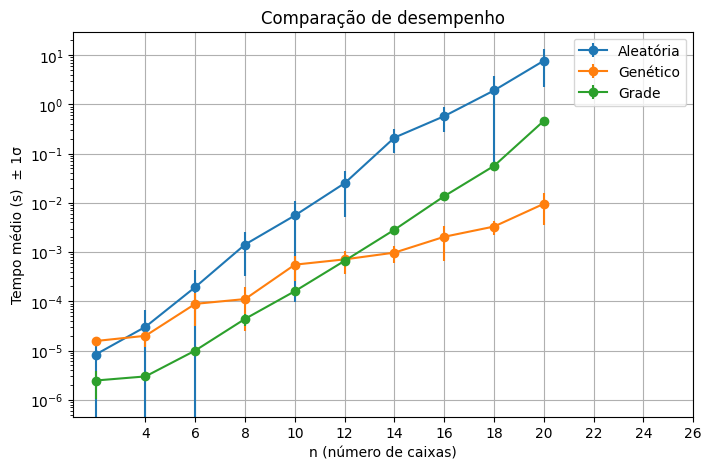

In [11]:
plt.figure(figsize=(8,5))
for alg, sub in agr.groupby("algoritmo"):
    plt.errorbar(sub["n"], sub["mean"], yerr=sub["std"], label=alg, marker='o')
plt.xlabel("n (número de caixas)")
plt.ylabel("Tempo médio (s)  ± 1σ")
plt.title("Comparação de desempenho")
plt.legend()
plt.grid(True)
plt.xticks(range(4, 28, 2))
plt.yscale("log")
plt.show()

Excelente! Com esse gráfico, podemos visualizar claramente o desempenho dos três métodos de busca para o problema das caixas binárias.

O desempenho dos métodos de busca varia conforme o tamanho do problema (número de caixas). A Busca Aleatória tende a ser menos eficiente para problemas maiores, enquanto o Algoritmo Genético e a Busca em Grade mostram um desempenho mais consistente.

## 📖 Referências

[1] https://docs.python.org/3/library/time.html